In [31]:
import numpy as np
import matplotlib.pyplot as plt
import rubidium.D1 as d1
import rubidium.D2 as d2
import scipy as sci

# TODO: magnetic hyperfine splitting

Polarisation of light's effects?

What happens in the regime of super strong fields?

Is doppler shift distinct from doppler broadening?


In [32]:
d1.abundance = {"85": 0.01, "87": 0.99}
T = 273.15 + 65  # Temperature in Kelvin
Lc = 0.075  # Length of cell in meters

c = sci.constants.c
delta = np.linspace(-4, 6, 10000)  # detuning in GHz
transdata = d1.Transmission(delta * 1e9, T, Lc)

ndata = d1.Totaln(delta * 1e9, T)

vg = d1.groupVelocity(delta, T, Lc)
transit = Lc / vg
timeshift = transit - Lc / c

(0.0, 1.1)

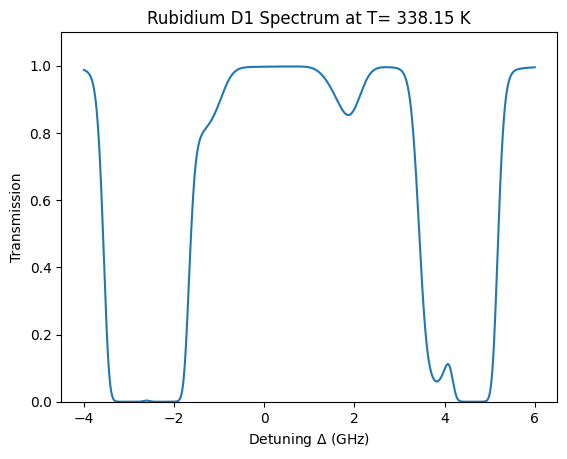

In [33]:
plt.plot(delta, transdata)
plt.title("Rubidium D1 Spectrum at T= " + str(T) + " K")
plt.xlabel(r"Detuning $\Delta$ (GHz)")
plt.ylabel("Transmission")
plt.ylim(0, 1.1)

In [34]:
d2.abundance = {"85": 0.01, "87": 0.99}
T = 273.15 + 65  # Temperature in Kelvin
Lc = 0.075  # Length of cell in meters

c = sci.constants.c
delta = np.linspace(-4, 6, 1000)  # detuning in GHz
transdata = d2.Transmission(delta * 1e9, T, Lc)

ndata = d2.Totaln(delta * 1e9, T)

vg = d2.groupVelocity(delta, T, Lc)
transit = Lc / vg
timeshift = transit - Lc / c

(0.0, 1.1)

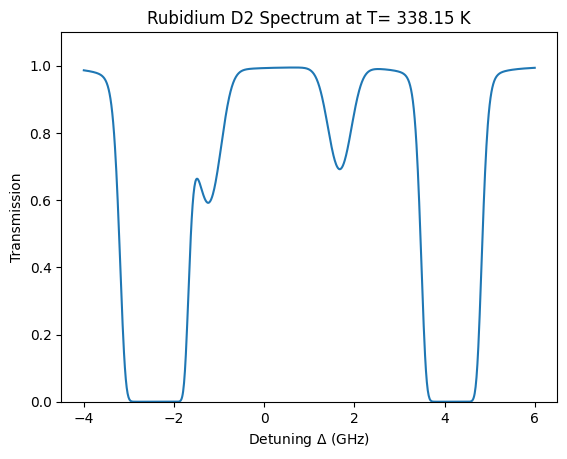

In [35]:
plt.plot(delta, transdata)
plt.title("Rubidium D2 Spectrum at T= " + str(T) + " K")
plt.xlabel(r"Detuning $\Delta$ (GHz)")
plt.ylabel("Transmission")
plt.ylim(0, 1.1)

In [ ]:
# 1. simulate the noise and add it to the spectrum
# 2. create a model to parse the original spectrum from the noise
# 3. compare model output with ground truth


def add_gaussian_noise(signal, noise_level=0.05):
    """Adds Gaussian (white) noise."""
    noise = np.random.normal(0, noise_level * np.max(signal), size=signal.shape)
    return signal + noise